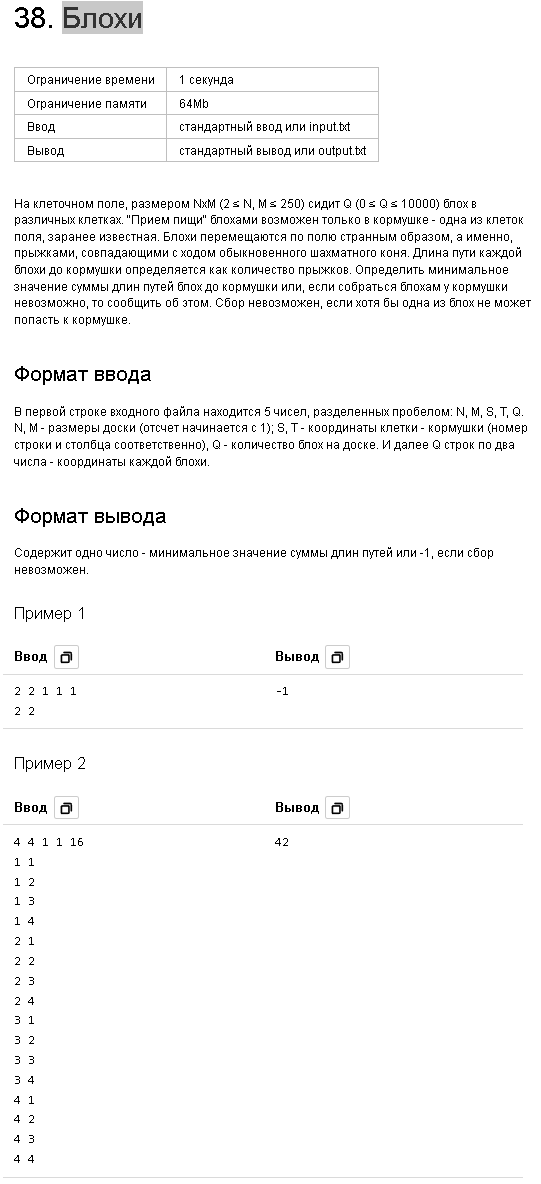

In [24]:
filename = "fleas_input_2.txt"

class Ceil:
    def __init__(self, passability, x, y):
        self.dist = None
        self.flea = 0
        self.feeder = 0
        self.passability = passability
        self.x = x
        self.y = y

    def __repr__(self):
        return "@" if self.feeder else "*" if self.flea else "0" if self.passability else "#"


with open(filename, encoding="utf-8") as src:
    n, m, s, t, q = map(int, src.readline().split())

    # Определим поле [dist, flea, feeder, passability]
    pole = [[Ceil(1, x + 2, y + 2) for y in range(m)] for x in range(n)]

    # Список блох
    fleas_lst = []

    # Отметим блох
    while q > 0:
        x, y = map(int, src.readline().split())
        fleas_lst.append((x+1, y+1))
        pole[x-1][y-1].flea= 1
        q -= 1

    # Отметим кормушку
    pole[s-1][t-1].feeder = 1


# Создадим дополнительные границы для поля
for i in range(n):
    pole[i] = [Ceil(0, i+2, 0), Ceil(0, i+2, 1)] + pole[i] + [Ceil(0, i+2, m+2), Ceil(0, i+2, m+3)]

pole = [[Ceil(0, 1, y) for y in range(m + 4)]] + pole
pole = [[Ceil(0, 0, y) for y in range(m + 4)]] + pole


pole = pole + [[Ceil(0, n + 2, y) for y in range(m + 4)]]
pole = pole + [[Ceil(0, n + 3, y) for y in range(m + 4)]]

# Создадим массив сдвигов
dx = [-2, -2,  2, 2, -1,  1, -1, 1]
dy = [-1,  1, -1, 1, -2, -2,  2, 2]


pole[s+1][t+1].dist = 0
queue = [pole[s+1][t+1]]
while queue:
    curr = queue.pop(0)
    for i in range(8):
        node = pole[curr.x + dx[i]][curr.y + dy[i]]
        if node.passability and node.dist is None:
            node.dist = curr.dist + 1
            queue.append(node)


maximum = -float("inf")
summ = 0
flag = False
for flea in fleas_lst:
    x, y = flea
    if pole[x][y].dist is None:
        flag = True
        break
    else:
        summ += pole[x][y].dist

print(-1 if flag else summ)


pole

42


[[#, #, #, #, #, #, #, #],
 [#, #, #, #, #, #, #, #],
 [#, #, @, *, *, *, #, #],
 [#, #, *, *, *, *, #, #],
 [#, #, *, *, *, *, #, #],
 [#, #, *, *, *, *, #, #],
 [#, #, #, #, #, #, #, #],
 [#, #, #, #, #, #, #, #]]